In [ ]:
import rasterio as rio
import matplotlib.pyplot as plt
import rasterio.warp as warp
import rasterio.plot as rioPlt

In [ ]:
s_orig = rio.open('../Sentinel-2/S2A_20190917_MSK_SNWPRB_20m.jp2')

In [4]:
array_orig_firstBand = s_orig.read(1)
array_orig_firstBand.shape

(5490, 5490)

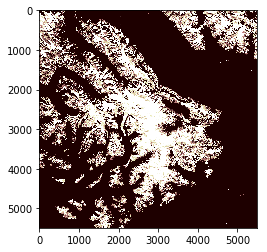

In [5]:
plt.imshow(array_orig_firstBand, cmap='pink')


In [6]:
s_orig.meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 5490,
 'height': 5490,
 'count': 1,
 'crs': CRS.from_epsg(32621),
 'transform': Affine(20.0, 0.0, 600000.0,
        0.0, -20.0, 7800000.0)}

In [ ]:
plt.hist(array_orig_firstBand)
plt.show()

KeyboardInterrupt: 